In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [2]:
import os
notebook_path = os.path.abspath("double_descent_mtcars_reg.ipynb")
print(notebook_path)
csv_path = os.path.join(os.path.dirname(notebook_path), "data/mt_cars.csv")
print(csv_path)

/Users/jeanortega/PycharmProjects/pythonProject1/double_descent_mtcars_reg.ipynb
/Users/jeanortega/PycharmProjects/pythonProject1/data/mt_cars.csv


In [3]:
df = pd.read_csv(csv_path)

In [4]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Split X and y

In [5]:
TARGET_COL = "mpg"

In [6]:
NON_NUMERIC_COLS = ["model"]

In [7]:
y = df[TARGET_COL]
X = df.drop([TARGET_COL] + NON_NUMERIC_COLS,axis=1)

# Functions

In [8]:
random_state = 10 # For reproducibility
num_sampled_rows = 4
num_sampled_columns = 5

In [9]:
indices = np.random.choice(df.index, num_sampled_rows, replace=False)

In [10]:
# X_subset = X.sample(n=num_sampled_rows, random_state=random_state, axis=0)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

In [11]:
X_subset = X_subset.sample(n=num_sampled_columns, random_state=random_state, axis=1)

In [12]:
X_subset

,gear,hp,qsec,vs,drat
19,4,65,19.90,1,4.22
9,4,123,18.30,1,3.92
3,3,110,19.44,1,3.08
22,3,150,17.30,0,3.15


In [13]:
y_subset

19    33.9
9     19.2
3     21.4
22    15.2
Name: mpg, dtype: float64

# Using the package

In [14]:
# The simplest way to make this reproducible.
np.random.seed(0)

In [15]:
from double_descent_dar import sample_eval

In [16]:
random_state = None # Set for reproducibility
num_sampled_rows = 3
num_sampled_columns = 4

In [17]:
X_sub, y_sub = sample_eval.sample_rows_and_cols(X, y, num_sampled_rows=num_sampled_rows, num_sampled_columns=num_sampled_columns, random_state=random_state, replace=False) 
X_sub

,qsec,hp,am,wt
11,17.4,180,0,4.070
22,17.3,150,0,3.435
10,18.9,123,0,3.440


In [18]:
X_sub

,qsec,hp,am,wt
11,17.4,180,0,4.070
22,17.3,150,0,3.435
10,18.9,123,0,3.440


In [19]:
y_sub

11    16.4
22    15.2
10    17.8
Name: mpg, dtype: float64

In [20]:
# model = RandomForestRegressor()
# model = linear_model.Ridge(alpha=.5)
model = linear_model.LinearRegression(fit_intercept=True)

In [21]:
# my_metric = root_mean_squared_error
my_metric = mean_absolute_error

In [22]:
X.shape

(32, 10)

# Bias-variance U curve

Seeing a traditional bias-variance U curve requires that the number of parameters should be a lot less than the number of rows.  Since the data set has 9 columns, we will need a lot more rows. This section will sample 30 rows (out of a total of 32) and then use a 50% train/test split, resulting in 15 rows to train on.

We will sample between 2 and 8 columns (out of a total of 9 columns) to see how the error metric varies by the number of parameters.

Note that the regression used here includes an intercept, so 8 columns + 1 intercept -> 9 parameters.  With 15 rows to train on, full interpolation would be reached with 15 columns.

In [23]:
num_sampled_rows = 30

In [24]:
train_proportion = 0.5

In [25]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']

In [26]:
num_samples = 1000
metric_all_samples = []
for num_sampled_columns in range(1, X.shape[1]-1):
    metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))

In [27]:
for key, values in metric_all_samples:
    the_mean = np.mean(values)
    the_stdev = np.std(values)
    print(f'num_cols: {key}, mean error: {the_mean:9.3f}, stdev of error: {the_stdev:4.1f}')

num_cols: 1, mean error:     3.746, stdev of error:  1.0
num_cols: 2, mean error:     3.107, stdev of error:  0.8
num_cols: 3, mean error:     2.872, stdev of error:  0.6
num_cols: 4, mean error:     2.813, stdev of error:  0.6
num_cols: 5, mean error:     2.892, stdev of error:  0.7
num_cols: 6, mean error:     3.077, stdev of error:  0.9
num_cols: 7, mean error:     3.353, stdev of error:  1.3
num_cols: 8, mean error:     3.805, stdev of error:  1.5


In [28]:
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]

In [29]:
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]

In [30]:
my_metric.__name__

'mean_absolute_error'

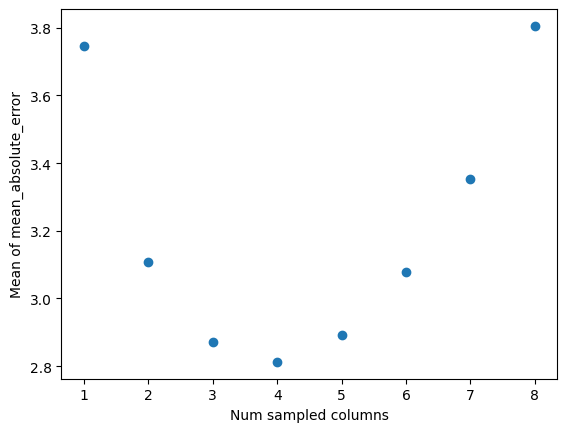

In [31]:
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

That is a beautiful U shape.  The linear regression's lowest average test (out-of-sample) error was achieved at 4 columns, which with the intercept means 5 parameters to fit.  This is much less than the 9 columns available in the data set.

(There is no simple theory that predicts what the optimal number of parameters will be.) 

## Double descent

A paper by Dar et al. (), called "Farewell to Bias Variance?" showed mathematically that double descent could be exhibited by linear regression under certain conditions. 

The paper: 
Yehuda Dar, Muthukumar, V., & Baraniuk, R. (2021). A Farewell to the Bias-Variance Tradeoff? An Overview of the Theory of Overparameterized Machine Learning. https://arxiv.org/abs/2109.02355


Here I show double descent empirically on the mtcars data set (widely used by R users).

Seeing double descent requires that the number of parameters should be a lot MORE than the number of rows. Since the data set has only 9 columns, we achieve this with a trick-- sampling fewer rows.

This section will sample 14 rows (out of a total of 32) and then use a 50% train/test split, resulting in 7 rows to train on.

As before, will sample between 2 and 8 columns (out of a total of 9 columns) to see how the error metric varies by the number of parameters.  

The linear regression model will be able to fully interpolate the data at N=6 columns because that results in N+1=7 parameters to be fit to the 7 rows.

In [32]:
num_sampled_rows = 14

In [33]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']

In [34]:
num_samples = 200
train_proportion = 0.5
metric_all_samples = []
for num_sampled_columns in range(1, X.shape[1]-1):
    metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))

In [35]:
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]

In [36]:
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]

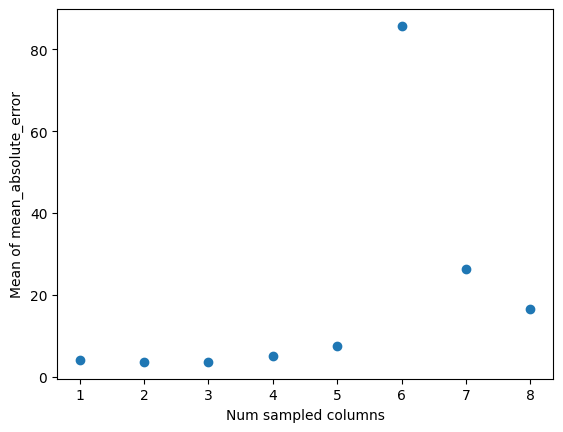

In [37]:
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

As predicted, there was a spike in test (out of sample) error when sampling 6 columns.  The fitting method is highly unstable here due to full interpolation.  Error descends a second time after this threshold-- so we observe classic double descent-- formerly thought of a neural net feature-- with simple, traditional linear regression.

## Double descent is actually two U curves in linear regression

A recent paper pointed out that different fitting methods are used on different sides of the interpolation threshold in linear regression.  When the number of rows N > number of paramters p, the best estimator involves inverting the N x p matrix.  But a matrix with more columns than rows cannot be inverted, so other parameter estimation methods are required.  The paper argues that it is this change in estimation methods that produces the two humps.  Each estimation method on its own has a U-shaped bias-variance curve, and the so-called double descent shape is just blending these two U's.

The paper:
Curth, A., Jeffares, A., & Schaar, M. van der. (2023, November 2). A U-turn on Double Descent: Rethinking Parameter Counting in Statistical Learning. Thirty-seventh Conference on Neural Information Processing Systems. https://openreview.net/forum?id=O0Lz8XZT2b


Here I address that point by using a version of linear regression that uses the same estimation method on both sides of the interpolation threshold-- stochastic gradient descent, the same method used by neural nets.

Notes:
* The SGDRegressor assumes input has been scaled from 0 to 1, so I wrap it inside a pipeline to handle scaling.
* By default the SGDRegressor includes regularization, so to make it comparable to the pure LinearRegression example above, I have to set the penatly to None.

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(), SGDRegressor(random_state=0, penalty=None))

In [39]:
num_sampled_rows = 30

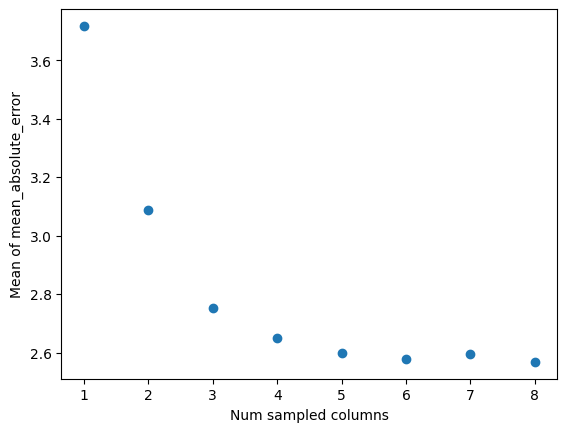

In [40]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']
num_samples = 300
train_proportion = 0.5
metric_all_samples = []
# This example won't converge because we have such a small data sst
# so we catch the warning and ignore it here.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for num_sampled_columns in range(1, X.shape[1]-1):
        metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

Nice!  This is the "left" half of a U curve.  It minimizes test (out-of-sample) error with 5 columns.

In [41]:
# Lower rows to see if we get double descent.
# The interpolation threshold is at 14/2 - 1 intercept = 5 columns.
num_sampled_rows = 14

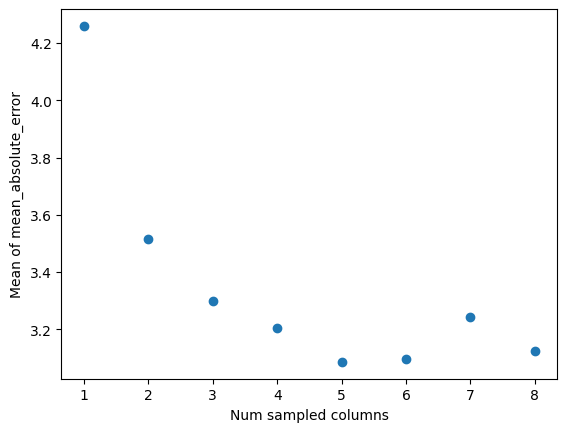

In [42]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']
num_samples = 300
train_proportion = 0.5
metric_all_samples = []
# This example won't converge because we have such a small data sst
# so we catch the warning and ignore it here.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for num_sampled_columns in range(1, X.shape[1]-1):
        metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

The bump up at 7 columns *might* be due to double descent, but we predicted it would happen at 6 columns, assuming this is fitting an intercept.

Let me squeeze harder by lowering the number of rows even more.  10 Rows means fitting on 5 rows, so the interpolation threshold will be at 4 columns.

In [43]:
# Lower rows to see if we get double descent.
num_sampled_rows = 10

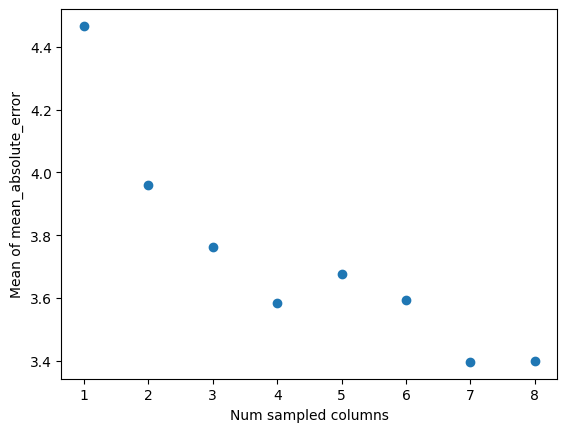

In [44]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']
num_samples = 300
train_proportion = 0.5
metric_all_samples = []
# This example won't converge because we have such a small data sst
# so we catch the warning and ignore it here.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for num_sampled_columns in range(1, X.shape[1]-1):
        metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

That does look double descent-ish thanks to bump up in test error at 5 columns.  However, that does not match the prediction of 4 columns being the interpolation threshold.

I need to study the SGDRegressor-- not to mention the possible effect of the StandardScaler-- to explain WHERE the bump up happens.

Based on the shapes above, using a consistent estimation method, I argue that **double descent is real** and not merely the overlap of two U curves from two different estimation methods.

# Appendix: Fun with an MLPRegressor

Now consider a simple one-layer, feed-forward neural net (MLP = multi-layer perceptron) that is fit with stochastic gradient descent.

Warning: the activation function makes it non-linear.

In [45]:
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# TODO: scale hidden layer neurons to number of columns.
model = make_pipeline(
    StandardScaler(), 
    MLPRegressor(hidden_layer_sizes=(4,), validation_fraction=0, solver="sgd", random_state=0))

In [46]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']

In [47]:
# First just look for the bias-variance U curve
num_sampled_rows = 30

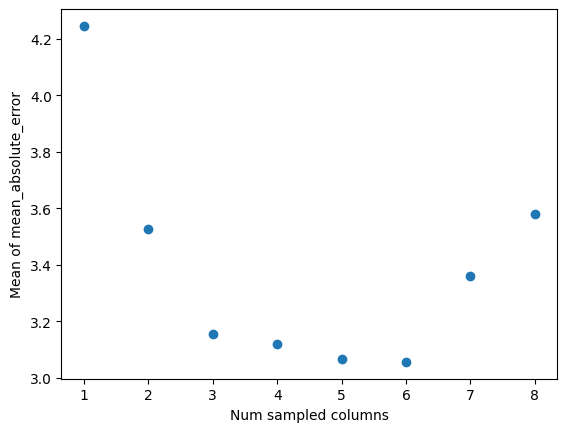

In [48]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']
num_samples = 400
train_proportion = 0.5
metric_all_samples = []
# This example won't converge because we have such a small data sst
# so we catch the warning and ignore it here.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for num_sampled_columns in range(1, X.shape[1]-1):
        metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

This looks pretty U-shaped.

In [49]:
# Lower the number of rows to look for double descent.
num_sampled_rows = 10

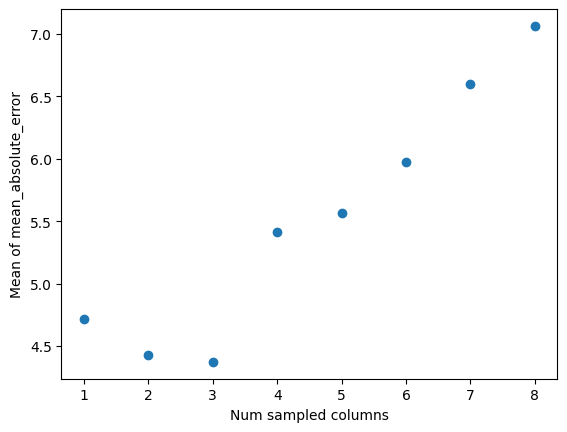

In [50]:
def sample_by_num_cols(num_sampled_columns_local):
    return sample_eval.sample_and_calc_metric(X, y, num_sampled_rows, num_sampled_columns_local, train_proportion, model, my_metric, replace=False, random_state=random_state)['test']
num_samples = 400
train_proportion = 0.5
metric_all_samples = []
# This example won't converge because we have such a small data sst
# so we catch the warning and ignore it here.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for num_sampled_columns in range(1, X.shape[1]-1):
        metric_all_samples.append((num_sampled_columns, [sample_by_num_cols(num_sampled_columns) for _ in range(num_samples)]))
metric_means = [(col_val_tuple[0], np.mean(col_val_tuple[1])) for col_val_tuple in metric_all_samples]
res = list(zip(*metric_means))
num_cols = res[0]
means = res[1]
plt.scatter(num_cols, means)
plt.xlabel("Num sampled columns")
plt.ylabel("Mean of " + my_metric.__name__)
plt.show()

I'm not sure what pattern I'm seeing.  But to do this in an apples-to-apples way with the prior regression studies, the number of hidden layer neurons should correspond to the number of sampled columns (because a weight is estimated for each neuron, and we want the number of parameters to scale, not just number of inputs).  Or maybe something else?  I'm still working on this one.